# Analyzing Diva Vocal Tract Somatosensory System

In [1]:
%matplotlib inline
#Imports
from divapy import Diva
from divaml import Diva as Divaml
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed, interact_manual, HBox
import ipywidgets as widgets
from IPython import display

In [9]:
m = []
for i in range(10):
    m += [widgets.FloatSlider(value=0, min=-3., max=3.,
                                 step=0.1,
                                 disabled=False,
                                 continuous_update=False,
                                 description = 'M'+str(i),
                                 orientation='vertical',
                                 readout=True,
                                 readout_format='f',
                                 slider_color='white'
                                 )]
    
for i in range(3):
    m += [widgets.FloatSlider(value=0, min=0., max=1.,
                                 step=0.1,
                                 disabled=False,
                                 continuous_update=False,
                                 description = 'M'+str(i+10),
                                 orientation='vertical',
                                 readout=True,
                                 readout_format='f',
                                 slider_color='white'
                                 )]
    
sys = Diva()
sysml = Divaml()

matplotlib.rcParams['figure.figsize'] = (16.0, 14.0)
matplotlib.rcParams.update({'font.size': 18})

In [14]:
def vt_som_plot(foo):
    display.clear_output(wait=True)
    arts = np.array([x.get_interact_value() for x in m])
    fig, ax = plt.subplots(2,3)
    aud,som,c,af = sys.get_audsom(arts)
    
    sysml.set_action(arts)
    sysml.vocalize()
    
    ax[0,0] = sys.plot_outline(arts, axes=ax[0,0])
    
    plt.sca(ax[0,1])
    plt.plot(aud,'b')
    plt.hold(True)
    plt.plot(sysml.aud,'r')

    plt.sca(ax[1,1])
    plt.plot(som)
    plt.hold(True)
    plt.plot(sysml.som,'r')
    ax[1,1].set_ylim([-1,1])
    ax[1,1].invert_xaxis()

    plt.sca(ax[1,2])
    plt.plot(af)
    plt.hold(True)
    plt.plot(sysml.af,'r')
    ax[1,2].invert_xaxis()

    
    

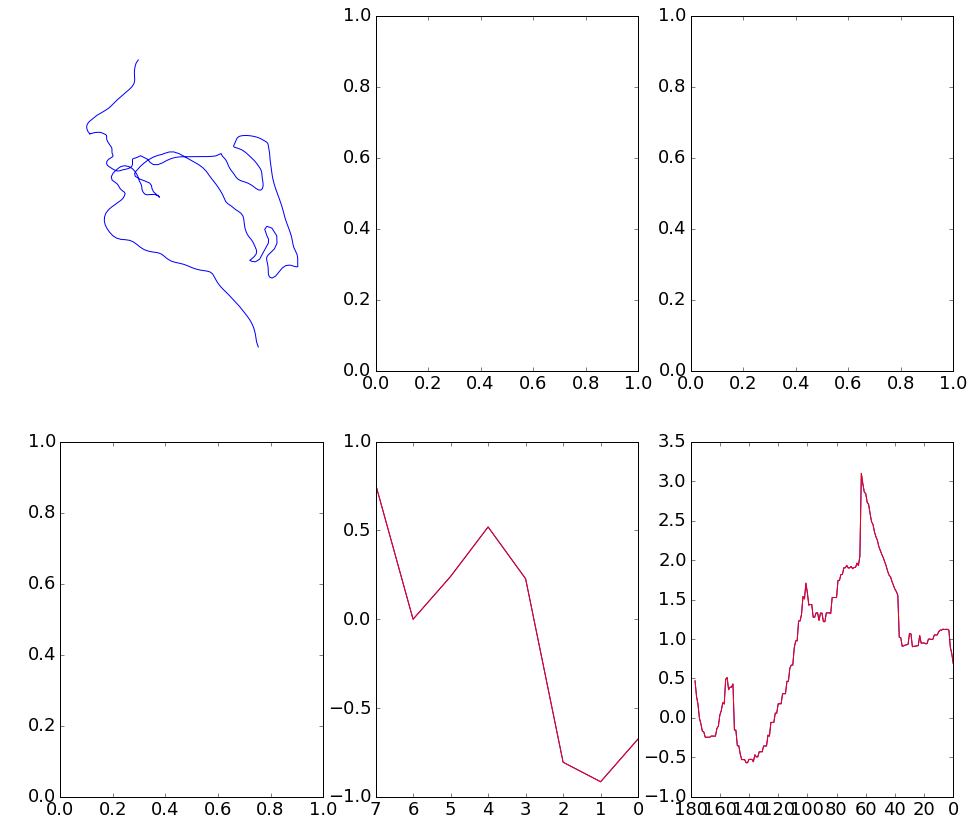

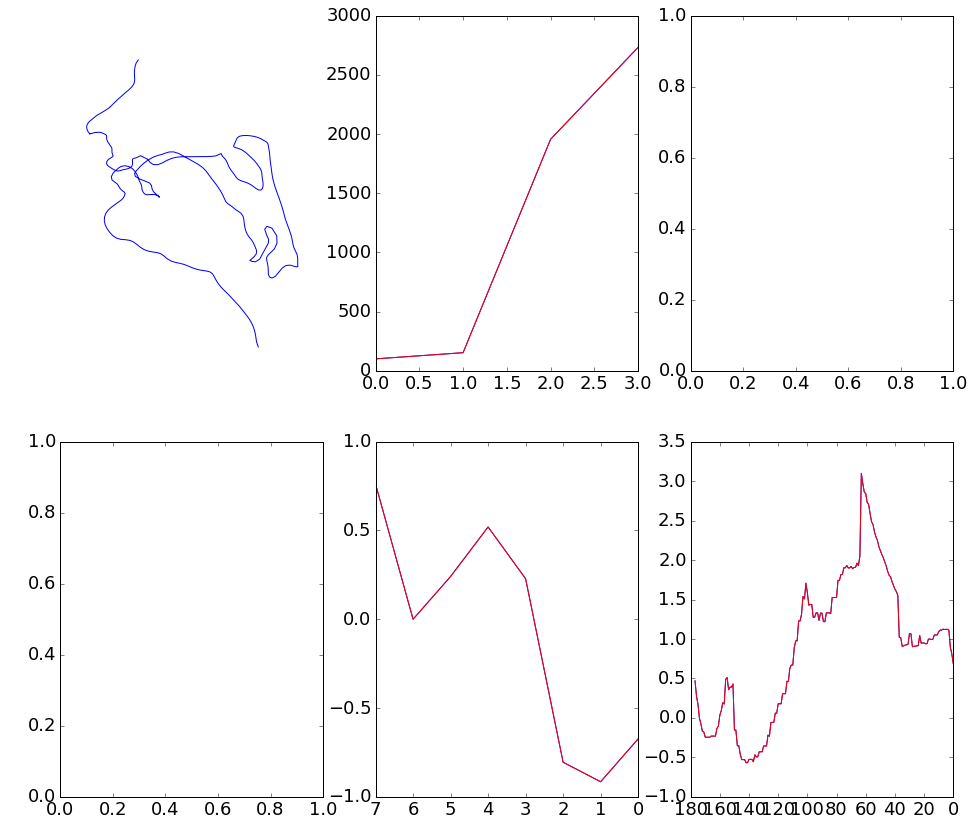

In [15]:
for x in m: 
    x.observe(vt_som_plot,names='value') 
display.display(HBox(m))